# Relax Inc. Data Science Challenge

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


last_session_creation_time and invited_by_user_id has some missing data

In [4]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
#change last_session_creation_time to datetime
users.last_session_creation_time= pd.to_datetime(users.last_session_creation_time)

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [8]:
#import the user engagement file
engagements = pd.read_csv('takehome_user_engagement.csv')

In [9]:
engagements.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
engagements.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [12]:
#change timestamp to datetime and set it as index
engagements.time_stamp= pd.to_datetime(engagements.time_stamp)

In [13]:
engagements.set_index('time_stamp',inplace=True)

In [14]:
engagements.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [15]:
print('Total number of users =', engagements.user_id.nunique())

Total number of users = 8823


# Adopted user definition
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

In [16]:
#let's resample the data on weekly basis and group it by user_id
week_users = engagements.groupby('user_id').resample('1w').sum().drop('user_id',axis=1)

In [17]:
week_users.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

In [18]:
# remove the entries with visited=0 
week_users=week_users[week_users.visited !=0]

In [19]:
week_users.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1

In [20]:
#based on the definition of adopted user, let's filter the users that have visited 3 or more times 
#and tag as adopted_user
week_users.reset_index(inplace=True)
qualified_users= week_users[week_users.visited>=3].drop('time_stamp',axis=1)
qualified_users.set_index('user_id',inplace=True)
qualified_users = qualified_users.groupby('user_id').sum().drop('visited',axis=1)
qualified_users['adopted_user']=1

In [21]:
qualified_users.head()

,adopted_user
user_id,
2,1
10,1
20,1
33,1
42,1


In [22]:
#merge the qualified_users with users.
users_merged = users.merge(qualified_users,how='left',left_on='object_id',right_on='user_id')

In [23]:
users_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,NaN


In [24]:
users_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  1445 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [25]:
#change creation time to datetime
users_merged.creation_time=pd.to_datetime(users_merged.creation_time)
users_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,NaN


In [26]:
#columns last_session_creation_time, invited_user_id and adopted_user have null values
#we can fill invited_by_user_id and adopted_user with 0
#for last_session_creation_time, we can used the value from the creation_time 
users_merged['last_session_creation_time'].fillna(users_merged['creation_time'], inplace=True)
users_merged['invited_by_user_id'].fillna(0, inplace=True)
users_merged['adopted_user'].fillna(0, inplace=True)

In [27]:
users_merged.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time    False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id            False
adopted_user                  False
dtype: bool

In [28]:
#preparing the dataset for modeling
#get dummy values on cretation_source and ori_id feature columns
users_merged = pd.get_dummies(users_merged,columns=['creation_source','org_id'],drop_first=True)
#drop user name and email column
users_merged = users_merged.drop(['name','email'],axis=1)
#change creation time and last session time back to integer values
users_merged.creation_time=users_merged.creation_time.astype('int64')
users_merged.last_session_creation_time=users_merged.last_session_creation_time.astype('int64')
users_merged.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,1398138810000000000,1398138810,1,0,10803.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1384487104000000000,1396237504,0,0,316.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1363734892000000000,1363734892,0,0,1525.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1369123768000000000,1369210168,0,0,5151.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1358417660000000000,1358849660,0,0,5240.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#assigning X and y and splitting the data into train and test data
X= users_merged.drop('adopted_user',axis=1)
y = users_merged['adopted_user']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
#Use grid search to get the best paramenters for random forest classifier
grid={'max_depth':[10,30,50,70],
             'min_samples_leaf':[1,2,4,6],
              'max_features':['auto','sqrt','log2']}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, grid,cv = 5)

cv.fit(X_train, y_train)
print('best parameter:{}'.format(cv.best_params_),'best score:{}'.format(cv.best_score_))

best parameter:{'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 1} best score:0.9639285714285715


In [33]:
# fit the data with best model
clf = RandomForestClassifier(max_depth=70 ,max_features= 'auto' ,min_samples_leaf= 1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

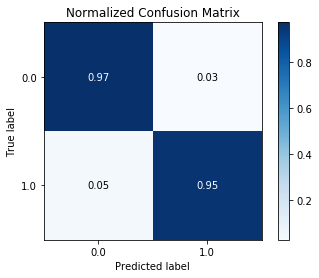

In [34]:
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(clf.predict(X_test), y_test, normalize=True)
plt.show()

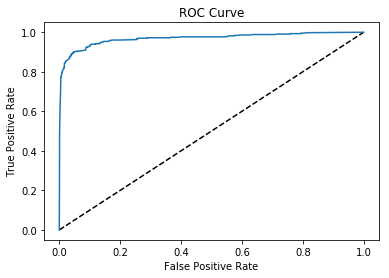

In [35]:
#plot ROC curve
y_pred_prob= clf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds =metrics.roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [37]:
# print classification report
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3246
         1.0       0.78      0.95      0.85       354

    accuracy                           0.97      3600
   macro avg       0.89      0.96      0.92      3600
weighted avg       0.97      0.97      0.97      3600



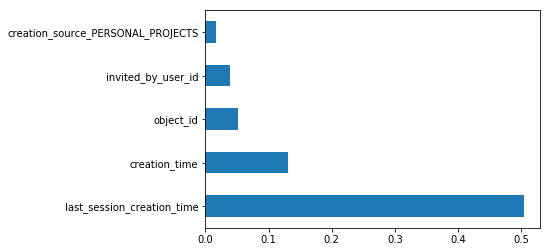

In [38]:
# plot important features
feature_importance= pd.Series(clf.feature_importances_,index=X_train.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()


The last_session_creation date is top feature in predicting adopted users. The company should work on creating schemes and offers to encourage their users to login more often. How the user signed up is also an important feature. Invitation by current users and personal projects have more importance. Current user can be given incentives to invite their family and friends. 